In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


image = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (512, 512))

In [2]:
def generateHistogram(image):
    histogram = np.zeros(256)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1
    return histogram

### Histogram equalization

In [3]:
def histogram_equalization(image, hist):

    # Step 2: Compute the cumulative distribution function (CDF)
    cdf = np.zeros(256, dtype=float)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]

    # Normalize the CDF to the range [0, 255]
    cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255
    cdf_normalized = cdf_normalized.astype(np.uint8)

    # Step 3: Map the image pixels using the normalized CDF
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j] = cdf_normalized[image[i, j]]

    # Generate the new histogram for the equalized image
    equalized_histogram = generateHistogram(equalized_image)

    return equalized_image, equalized_histogram
    

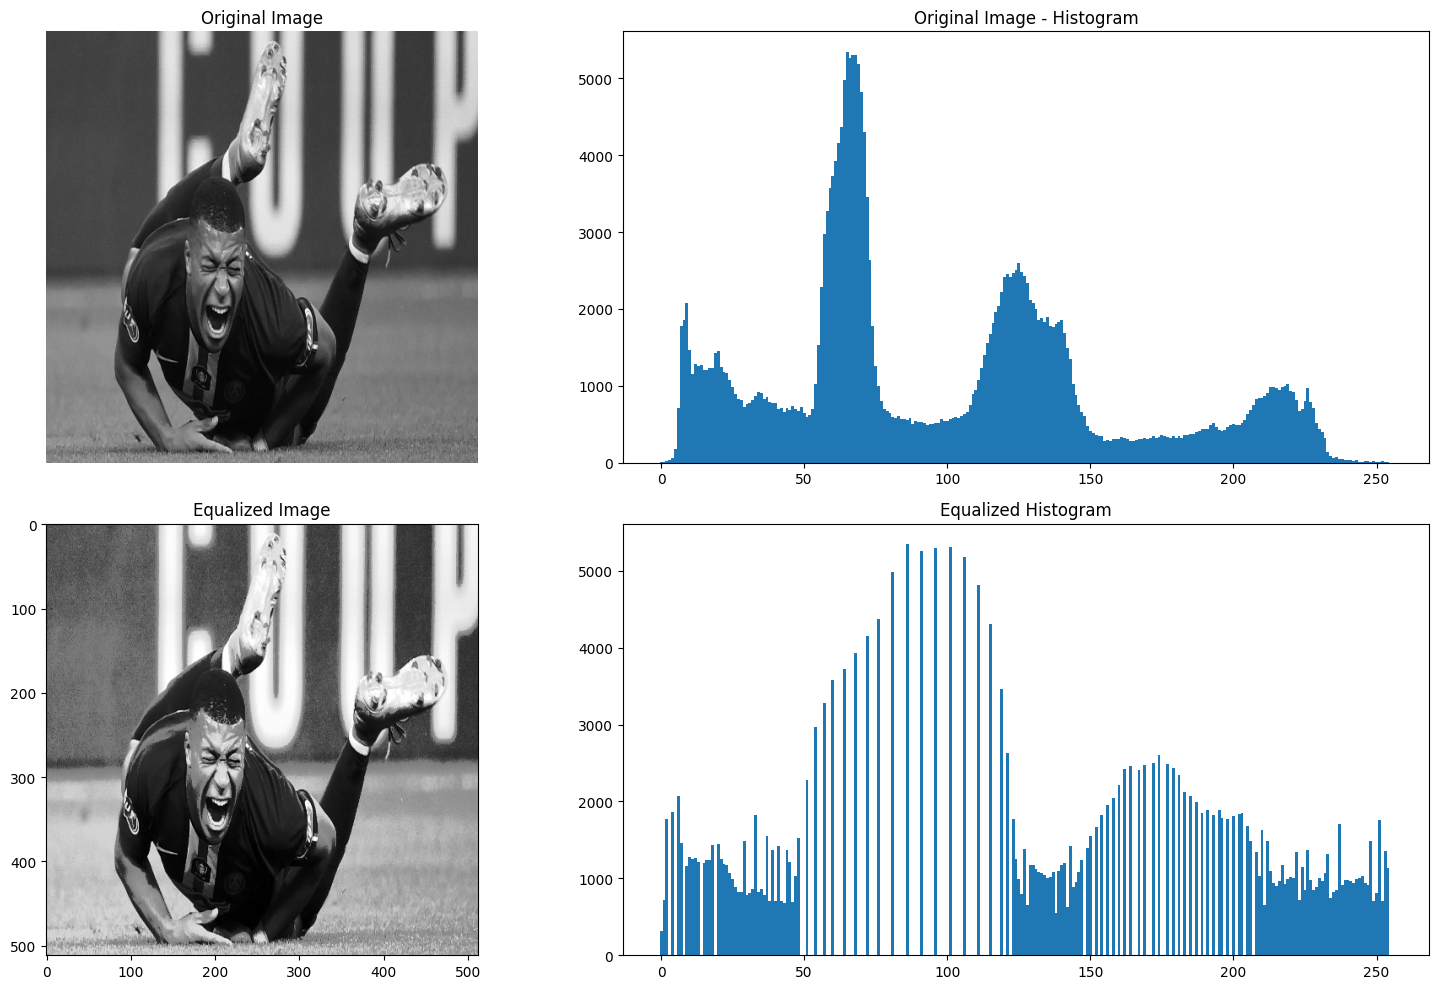

In [4]:
plt.figure(figsize=(16,10))


plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')


hist = generateHistogram(image)
plt.subplot(2, 2, 2)
plt.bar(range(256), hist, width=1.0)
plt.title("Original Image - Histogram")


equalizedImage, equalizedHistogram = histogram_equalization(image, hist)

plt.subplot(2, 2, 3)
plt.title(f"Equalized Image")
plt.imshow(equalizedImage, cmap='gray')

plt.subplot(2, 2, 4)
plt.title(f"Equalized Histogram")
plt.bar(range(256), equalizedHistogram, width=1.0)



plt.tight_layout()
plt.show()